# 台灣銀行牌告匯率爬蟲練習

In [76]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
# 進入台灣銀行牌告匯率網頁，查看當日匯率資料
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
#print(resp.text)
html=BeautifulSoup(resp.text , 'lxml')
html

<!DOCTYPE html>
<html class="no-js" lang="zh-TW">
<head>
<meta charset="utf-8"/>
<title>臺灣銀行牌告匯率</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="臺灣銀行匯率利率黃金牌價查詢" name="description"/>
<meta content="" name="keywords"/>
<meta content="width=device-width, initial-scale=1, user-scalable=no" name="viewport"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="index,follow" name="robots"/>
<link href="/favicon.ico" rel="icon" type="image/x-icon"/>
<link href="/Content/css/font-awesome.min.css" rel="stylesheet"/>
<link href="/Content/css/jquery-ui.min.css" rel="stylesheet"/>
<link href="/Content/main-3.3.0.css" rel="stylesheet"/>
<style>
        h1.hero__header_small {
            font-size: 26px;
            margin: 12px 0;
        }

            h1.hero__header_eng {
                font-size: 20px;
                margin: -8px 0;
            }

        .chart-key-value .sp {
            position: relative;
            top: 2px;
        }

   

In [78]:
current_table=html.find_all("tr")[2]#.find("td",attrs={"data-table":"幣別"} )
print(current_table.find_all('div')[2].string.replace(" ",""))   #   .replace('', '')  記得空白
rate=current_table.find_all("td",attrs={"class":"rate-content-sight text-right print_hide" })
# print(rate)#[0].string)      string 是 <>     </td>  中間的東西
# print(rate[0]["data-table"])
for rate in rate:
    print(rate["data-table"]+':'+rate.string)


美金(USD)

本行即期買入:29.44
本行即期賣出:29.54


# 大師程式 

In [79]:
# 進入台灣銀行牌告匯率網頁，查看當日匯率資料
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
#resp = requests.get(url)
resp.encoding = 'utf-8'
# print(resp.text)  # 如有需要，列印出網頁原始碼

html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')
#print(html.find(name='table', attrs={'title':'牌告匯率'}))   
'''
1.name 寫不寫都沒差 
2. attrs={'title':'牌告匯率'}  這行代表'title':'牌告匯率' 後面所有的東西 一直到 table 這個標籤 結束
3.# 如果直接找 find("tr") 會找到 我們不需要的部分 我們需要的tr 在 tbody 這個標籤底下
'''
#print(rate_table)
# 查詢美金(也就是匯率表的第一個元素)對台幣的匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
#print(rate_table[0].find(name='div'))   沒加 屬性 就全印了
print(currency.get_text().replace(" ", ""))  # 去掉空白
'''
1. 現在 rate_table　為一個  list (  bs4  element <tag>)  
2. 美金是list的第一個  所以是 rate_table[0] 
3. 美金  這個 string 在 'visible-phone print_hide' 裡面 且是 div 的屬性 
'''
buy_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金買入'})
sell_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金賣出'})
print("即時現金買入: %s, 即時現金賣出: %s" % (buy_rate.get_text(), sell_rate.get_text()))
#print(buy_rate)
''' 
1.print(buy_rate) == <td class="rate-content-cash text-right print_hide" data-table="本行現金買入">29.09</td>
2. .get_text() == .string
'''


美金(USD)

即時現金買入: 29.09, 即時現金賣出: 29.76


' \n1.print(buy_rate) == <td class="rate-content-cash text-right print_hide" data-table="本行現金買入">29.09</td>\n2. .get_text() == .string\n'

# 作業part 1：請參考上面的範例，試著爬取所有貨幣對台幣的匯率

In [80]:
for x in range(2 , 20+1):
    current_table=html.find_all("tr")[x]#.find("td",attrs={"data-table":"幣別"} )
    print(current_table.find_all('div')[2].string.replace(" ",""))   #   .replace('', '')  記得空白
    rate=current_table.find_all("td",attrs={"class":"rate-content-sight text-right print_hide" })
    # print(rate)#[0].string)      string 是 <>     </td>  中間的東西
    # print(rate[0]["data-table"])
    for rate in rate:
        print(rate["data-table"]+':'+rate.string)


美金(USD)

本行即期買入:29.44
本行即期賣出:29.54

港幣(HKD)

本行即期買入:3.775
本行即期賣出:3.835

英鎊(GBP)

本行即期買入:38.3
本行即期賣出:38.72

澳幣(AUD)

本行即期買入:20.98
本行即期賣出:21.21

加拿大幣(CAD)

本行即期買入:21.92
本行即期賣出:22.14

新加坡幣(SGD)

本行即期買入:21.38
本行即期賣出:21.56

瑞士法郎(CHF)

本行即期買入:32.1
本行即期賣出:32.39

日圓(JPY)

本行即期買入:0.2762
本行即期賣出:0.2802

南非幣(ZAR)

本行即期買入:1.623
本行即期賣出:1.703

瑞典幣(SEK)

本行即期買入:3.32
本行即期賣出:3.42

紐元(NZD)

本行即期買入:19.33
本行即期賣出:19.53

泰幣(THB)

本行即期買入:0.9315
本行即期賣出:0.9715

菲國比索(PHP)

本行即期買入:-
本行即期賣出:-

印尼幣(IDR)

本行即期買入:-
本行即期賣出:-

歐元(EUR)

本行即期買入:34.5
本行即期賣出:34.9

韓元(KRW)

本行即期買入:-
本行即期賣出:-

越南盾(VND)

本行即期買入:-
本行即期賣出:-

馬來幣(MYR)

本行即期買入:-
本行即期賣出:-

人民幣(CNY)

本行即期買入:4.207
本行即期賣出:4.257


# 範例2：爬取一個月的美金對台幣歷史匯率資料，並畫出趨勢圖


In [81]:
url="https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp=requests.get(url)
resp.encoding="utf-8"
html=BeautifulSoup(resp.text , "lxml")



美金(USD)



<Figure size 720x576 with 0 Axes>

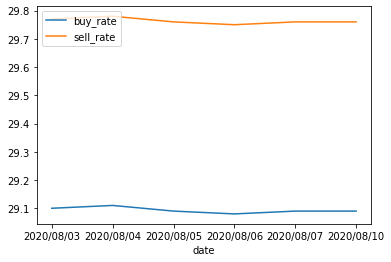


港幣(HKD)



<Figure size 720x576 with 0 Axes>

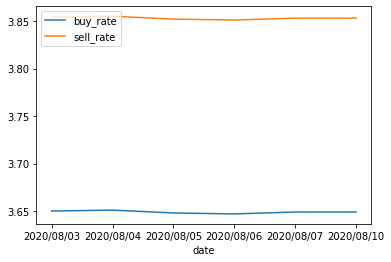


英鎊(GBP)



<Figure size 720x576 with 0 Axes>

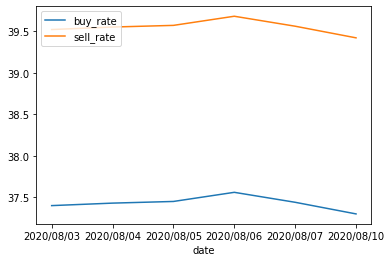


澳幣(AUD)



<Figure size 720x576 with 0 Axes>

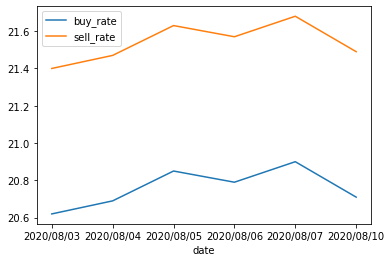


加拿大幣(CAD)



<Figure size 720x576 with 0 Axes>

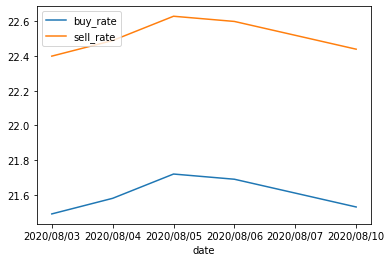


新加坡幣(SGD)



<Figure size 720x576 with 0 Axes>

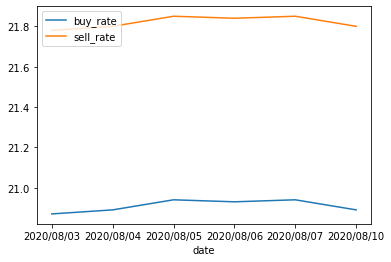


瑞士法郎(CHF)



<Figure size 720x576 with 0 Axes>

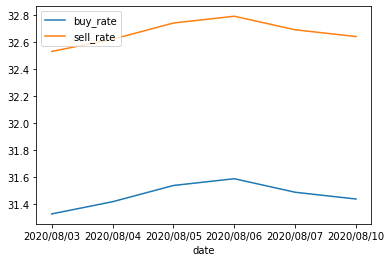


日圓(JPY)



<Figure size 720x576 with 0 Axes>

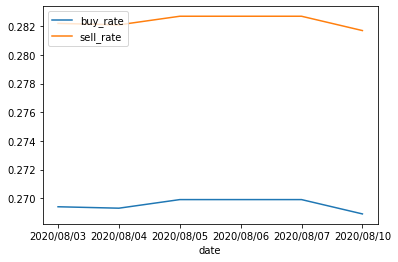


南非幣(ZAR)



<Figure size 720x576 with 0 Axes>

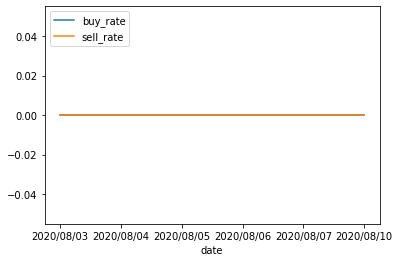


瑞典幣(SEK)



<Figure size 720x576 with 0 Axes>

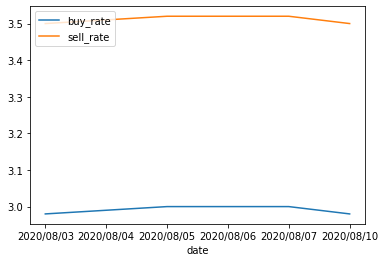


紐元(NZD)



<Figure size 720x576 with 0 Axes>

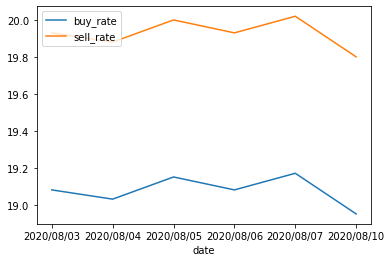


泰幣(THB)



<Figure size 720x576 with 0 Axes>

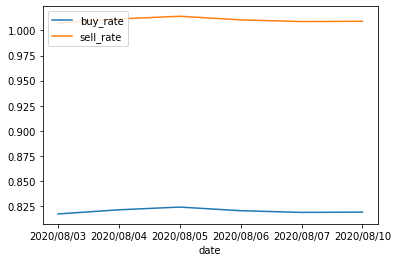


菲國比索(PHP)



<Figure size 720x576 with 0 Axes>

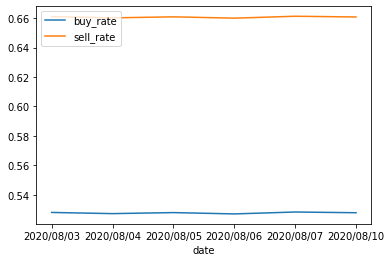


印尼幣(IDR)



<Figure size 720x576 with 0 Axes>

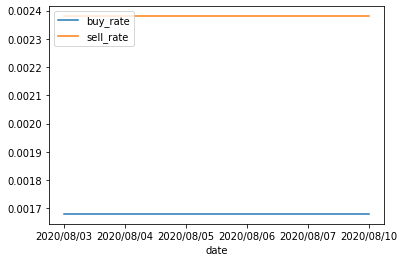


歐元(EUR)



<Figure size 720x576 with 0 Axes>

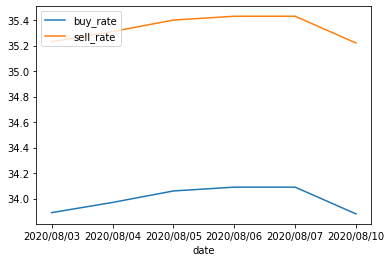


韓元(KRW)



<Figure size 720x576 with 0 Axes>

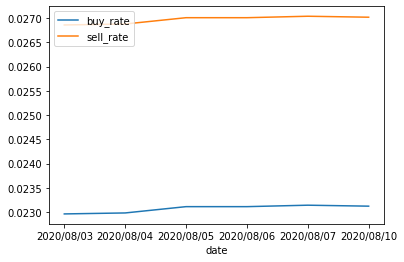


越南盾(VND)



<Figure size 720x576 with 0 Axes>

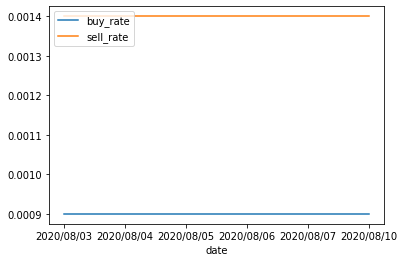


馬來幣(MYR)



<Figure size 720x576 with 0 Axes>

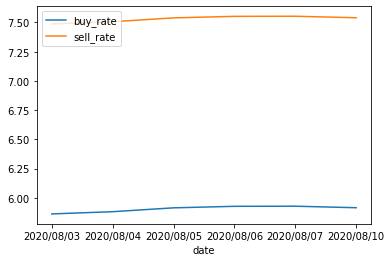


人民幣(CNY)



<Figure size 720x576 with 0 Axes>

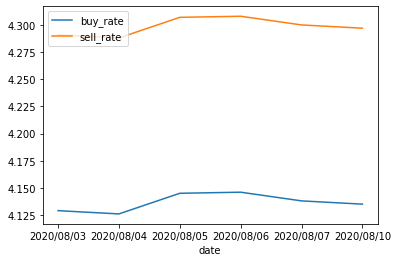

In [98]:
#先到牌告匯率首頁，爬取所有貨幣的種類
currency=html.find("tbody").find_all("tr")

#幣別資料
#print(currency[0])

#貨幣種類
for x in range(0, 18+1):
    print(currency[x].find('div',attrs={"class":"visible-phone print_hide"}).text.replace(" ",''))

# 針對不同幣別，找到其「歷史匯率」的首頁 
    history_link=currency[x].find("td",attrs={"data-table":"歷史匯率"})

#print(history_link.a['href'])
    history_rate_link="https://rate.bot.com.tw"+history_link.a['href']


#
# 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
#
# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料3
    quote_history_url = history_rate_link.replace("history", "quote/2020-08")
#print(history_rate_link)
#print(quote_history_url)
    resp=requests.get(quote_history_url)
    resp.encoding="utf-8"
    history=BeautifulSoup(resp.text , "lxml")

#   以上 決定 要甚麼貨幣  , 日期
# -----------------------------------------------------------------------------------------------------------------------
#   以下 為主程式

    history_table=history.find("table",attrs={"title":"歷史本行營業時間牌告匯率"}).find(name='tbody').find_all(name='tr')
#print(history_table)                                                         #這邊要加 tbody 不然會擷取到不要的 而且會讓底下 None
#
# 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
#
    date_history = list()
    history_buy = list()
    history_sell = list()

    for history_rate in history_table:
    # 擷取日期資料
        date_string = history_rate.a.get_text()
        date=datetime.strptime(date_string , '%Y/%M/%d' ).strftime('%Y/%M/%d')  #其實這段不用
        date_history.append(date)  ## 日期歷史資料
    
        history_cash_rate=history_rate.find_all("td",attrs={"class":"rate-content-cash text-right print_table-cell"})
    #print(history_cash_rate)
        history_buy.append(float(history_cash_rate[0].string))  # float表示一下 就 float
        history_sell.append(float(history_cash_rate[1].string))
# 將匯率資料建成dataframe形式
# 就 2維陣列
    dataframe=pd.DataFrame({"date":date_history ,
                            "buy_rate":history_buy ,
                            "sell_rate":history_sell})
    dataframe = dataframe.set_index('date')
    dataframe = dataframe.sort_index(ascending=True)
#print(dataframe)
# 畫出歷史匯率軌跡圖
    plt.figure(figsize=(10,8))
    dataframe[['buy_rate','sell_rate']].plot() # x=['date'], y=[['buy_rate','sell_rate']] 
    plt.legend(loc="upper left")
 #   print(dataframe)      # 這樣好像會大混亂 但我也不知道為甚麼
    plt.show()

In [94]:
#print(currency[18].find('div',attrs={"class":"visible-phone print_hide"}).text.replace(" ",''))


人民幣(CNY)



In [95]:
print(currency[0])

<tr>
<td class="currency phone-small-font" data-table="幣別">
<div>
<div class="sp-div sp-america-div">
<img alt="幣別國旗" class="sp-img sp-america-img" src="/Content/images/sprite_lateral.png" title="幣別國旗"/>
</div>
<br class="visible-phone print_hide"/>
<div class="visible-phone print_hide">
                                美金 (USD)
                            </div>
<div class="hidden-phone print_show" style="text-indent:30px;">
                                美金 (USD)
                            </div>
</div>
</td>
<td class="rate-content-cash text-right print_hide" data-table="本行現金買入">29.09</td>
<td class="rate-content-cash text-right print_hide" data-table="本行現金賣出">29.76</td>
<td class="rate-content-sight text-right print_hide" data-hide="phone" data-table="本行即期買入">29.44</td>
<td class="rate-content-sight text-right print_hide" data-hide="phone" data-table="本行即期賣出">29.54</td>
<td class="text-center print_hide phone-small-font" data-table="遠期匯率買入/賣出"><a href="/xrt/forward/USD">查詢</a></td